# Importing all required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [5]:
impersonation = pd.read_csv("gear_dataset.csv")

In [6]:
impersonation.head()

,1478193190.056566,0140,8,00,00.1,00.2,00.3,10,29,2a,24,R
0,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
1,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
2,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
3,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R
4,1.478193e+09,0440,8,ff,00,00,00,ff,c4,08,00,R


# Specifying Column names

In [7]:
impersonation.columns = ["Timestamp", "Message Identifier", "Data Length", "Data[0]", "Data[1]", "Data[2]", "Data[3]", "Data[4]", "Data[5]", "Data[6]", "Data[7]", "Target"]

In [8]:
impersonation.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],Target
0,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
1,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
2,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
3,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R
4,1.478193e+09,0440,8,ff,00,00,00,ff,c4,08,00,R


# Checking presence of NULL or NA values

In [9]:
impersonation.isnull().sum()

Timestamp                 0
Message Identifier        0
Data Length               0
Data[0]                   0
Data[1]                   0
Data[2]                   0
Data[3]               40165
Data[4]               40165
Data[5]               40165
Data[6]               40165
Data[7]               40165
Target                40165
dtype: int64

In [10]:
impersonation.isna().sum()

Timestamp                 0
Message Identifier        0
Data Length               0
Data[0]                   0
Data[1]                   0
Data[2]                   0
Data[3]               40165
Data[4]               40165
Data[5]               40165
Data[6]               40165
Data[7]               40165
Target                40165
dtype: int64

# Finding unique entries in Message Identifier

In [11]:
impersonation["Message Identifier"].unique()

array(['02c0', '0350', '0370', '043f', '0440', '0316', '018f', '0002',
       '0153', '0260', '0130', '0131', '0140', '02a0', '0329', '0545',
       '04f0', '0430', '04b1', '01f1', '05f0', '00a0', '00a1', '0690',
       '05a0', '05a2'], dtype=object)

In [12]:
impersonation["Message Identifier"].nunique(dropna = True)

26

In [13]:
impersonation["Target"].unique()

array(['R', nan, 'T'], dtype=object)

In [14]:
impersonation["Target"].nunique(dropna = False)

3

In [15]:
impersonation = impersonation.dropna(subset="Target")

In [16]:
impersonation["Target"].unique()

array(['R', 'T'], dtype=object)

# Creating time difference column

In [17]:
# Finding time difference between all consecutive entries belonging to same message identifier and storing it in TimeDiff column
impersonation["TimeDiff"] = impersonation.groupby("Message Identifier")["Timestamp"].diff()

In [18]:
impersonation

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],Target,TimeDiff
0,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R,NaN
1,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R,NaN
2,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R,NaN
3,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R,NaN
4,1.478193e+09,0440,8,ff,00,00,00,ff,c4,08,00,R,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R,0.009850
4443137,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R,0.009847
4443138,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R,0.009845
4443139,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R,0.009844


In [19]:
impersonation = impersonation.dropna(subset="TimeDiff")

In [20]:
impersonation

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],Target,TimeDiff
16,1.478193e+09,043f,8,10,40,60,ff,78,c3,08,00,R,0.008940
17,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R,0.009914
18,1.478193e+09,0350,8,05,20,54,68,77,00,00,6e,R,0.009909
19,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R,0.009913
20,1.478193e+09,0440,8,ff,00,00,00,ff,c3,08,00,R,0.009677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R,0.009850
4443137,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R,0.009847
4443138,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R,0.009845
4443139,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R,0.009844


# Visualising density of TimeDiff values using histogram

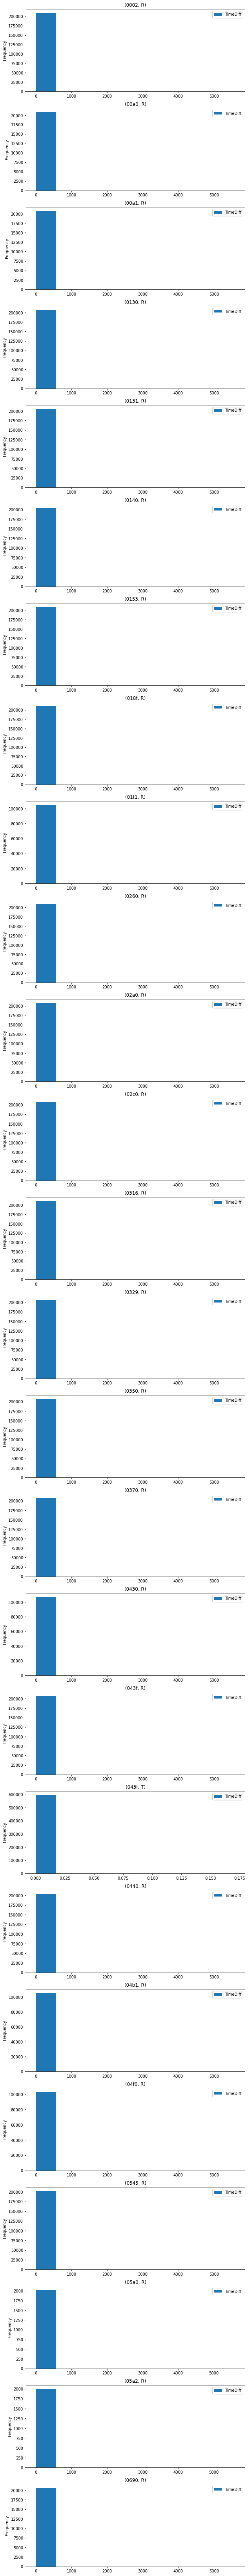

In [21]:
ax = impersonation.plot.hist(column = ["TimeDiff"], by=["Message Identifier", "Target"], figsize = (10,120))

# Creating X and y (X-independent variables, y- dependent target value)

In [22]:
X = impersonation.drop("Target", axis = 1)

In [23]:
X.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],TimeDiff
16,1.478193e+09,043f,8,10,40,60,ff,78,c3,08,00,0.008940
17,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,0.009914
18,1.478193e+09,0350,8,05,20,54,68,77,00,00,6e,0.009909
19,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,0.009913
20,1.478193e+09,0440,8,ff,00,00,00,ff,c3,08,00,0.009677


In [24]:
y = impersonation["Target"]

In [25]:
y

16         R
17         R
18         R
19         R
20         R
          ..
4443136    R
4443137    R
4443138    R
4443139    R
4443140    R
Name: Target, Length: 4402951, dtype: object

# Encoding Complete Data

In [26]:
# Since KNN cant work well with non numeric data. Hence it becomes necessary to encode the data into numeric values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
X["Message Identifier"] = le.fit_transform(X["Message Identifier"])

In [28]:
X["Data[0]"] = le.fit_transform(X["Data[0]"])
X["Data[1]"] = le.fit_transform(X["Data[1]"])
X["Data[2]"] = le.fit_transform(X["Data[2]"])
X["Data[3]"] = le.fit_transform(X["Data[3]"])
X["Data[4]"] = le.fit_transform(X["Data[4]"])
X["Data[5]"] = le.fit_transform(X["Data[5]"])
X["Data[6]"] = le.fit_transform(X["Data[6]"])
X["Data[7]"] = le.fit_transform(X["Data[7]"])

In [29]:
# Data completely Encoded into numeric values
X.head()

,Timestamp,Message Identifier,Data Length,Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7],TimeDiff
16,1.478193e+09,17,8,16,38,50,35,120,195,8,0,0.008940
17,1.478193e+09,11,8,21,0,0,0,0,0,0,0,0.009914
18,1.478193e+09,14,8,5,13,47,14,119,0,0,110,0.009909
19,1.478193e+09,15,8,0,13,0,0,0,0,0,0,0.009913
20,1.478193e+09,18,8,149,0,0,0,220,195,8,0,0.009677


# Splitting the dataset into train and test sections

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the data for easy computations

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Importing and applying KNN classifier on data

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Training the model using train section of the dataset
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [34]:
# Testing the model on the test section
y_pred = classifier.predict(X_test)

In [35]:
# Calculating confusion matrix and accuracy values
from sklearn.metrics import confusion_matrix, accuracy_score
confMat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

<AxesSubplot:>

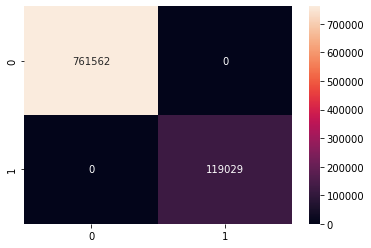

In [36]:
# Confusion matrix is the best measure tounderstand the true positive and false positive detections of our model.
confMat
sns.heatmap(confMat, annot=True, linecolor="yellow", fmt="d")

In [37]:
# Getting accuracy
accuracy

1.0